Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2025 <br>

<h1><center>Tarea 1 - Vicente Lavagnino</center></h1>

Profesor: Marcelo Mendoza<br>
Fecha de entrega: 07 de abril 2025



## Indicaciones

Se debe entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se asignará puntaje por el código implementado y los comentarios asociados a resultados.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es INDIVIDUAL.


**NOMBRE ESTUDIANTE: Vicente Antonio Lavagnino Gatica**

## Librerías

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar
from sklearn.preprocessing import MinMaxScaler


## Introducción

El dataset incluye variables cuantitativas y cualitativas sobre tipos de vinos.
A continuación, se presenta una breve descripción de cada atributo:

* type: Tipo de vino

* fixed acidity: Cantidad de ácidos poco volátiles

* volatile acidity: Cantidad de ácidos volátiles

* citric acid: Cantidad de ácido cítrico

* residual sugar: Cantidad de azúcar residual

* chlorides: Cantidad de cloruros

* free sulfur dioxide: Cantidad de dióxido de azufre libre

* total sulfur dioxide: Cantidad total de dióxido de azufre

* density: Densidad del vino

* pH: nivel de acidez o alcalinidad

* sulphates: Cantidad de sulfatos

* alcohol: Cantidad de alcohol

* quality: calidad del vino



## Parte 1: Carga y Preprocesamiento de Datos (20 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de Datos (2 puntos)

Cargue el dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos? De ser así, mencione el número de casos por variable y luego elimine todas filas que tengan a lo menos un valor nulo.


RESPUESTA: Vemos que el dataset tiene 6497 filas y 13 columnas. Sin embargo, existen 34 filas con datos nulos. Por lo tanto, eliminamos estas filas.

De esta forma, el dataset queda con 6463 filas y 13 columnas.

In [42]:
# Cargamos el data set
df = pd.read_csv('data.csv')

In [43]:
# Cantidad de filas y columnas
print(f"El conjunto de datos tiene {df.shape} filas y columnas respectivamente.")

El conjunto de datos tiene (6497, 13) filas y columnas respectivamente.


In [45]:
# Existencia de valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print("Valores nulos totales:", df.isnull().sum().sum())

# Cantidad de filas con valores nulos
print("Cantidad de filas con valores nulos:", df[df.isnull().any(axis=1)].shape[0])

Valores nulos por columna:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64
Valores nulos totales: 38
Cantidad de filas con valores nulos: 34


In [46]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)
print("Valores nulos después de eliminar filas:", df.isnull().sum())
print("Valores nulos totales:", df.isnull().sum().sum())

# Finalmente vemos como queda el dataframe
print(f"El conjunto de datos limpio {df.shape} filas y columnas respectivamente.")

Valores nulos después de eliminar filas: type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Valores nulos totales: 0
El conjunto de datos limpio (6463, 13) filas y columnas respectivamente.


### 1.2 Análisis descriptivo (12 puntos)

Mediante gráficos y medidas numéricas apropiadas, describa el comportamiento de cada variable del dataset.

Luego, presente gráficos que permitan relacionar las siguientes variables:

* "density" con "fixed acidity"
* "quality" con "alcohol"

Analice todos los resultados obtenidos y comente.

RESPUESTA: Mejorar grafico ya que en hstplot puedo agregar mas cosas

Descripción de la variable type:
count      6463
unique        2
top       white
freq       4870
Name: type, dtype: object


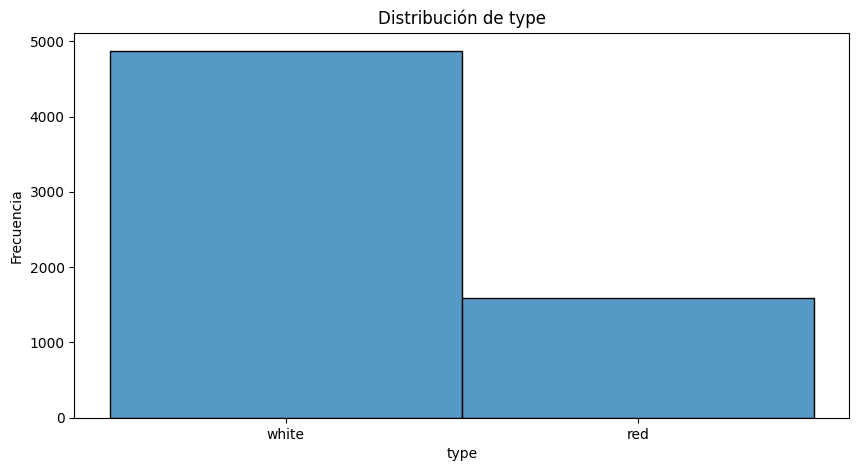

Descripción de la variable fixed acidity:
count    6463.000000
mean        7.217755
std         1.297913
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64


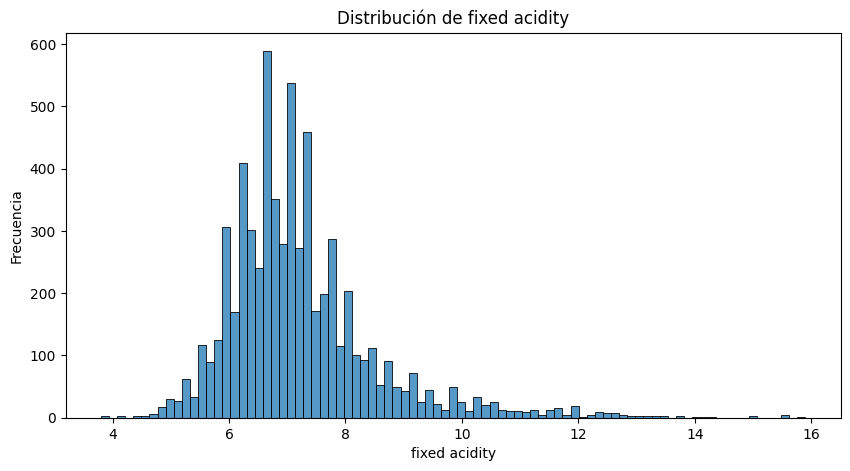

Descripción de la variable volatile acidity:
count    6463.000000
mean        0.339589
std         0.164639
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile acidity, dtype: float64


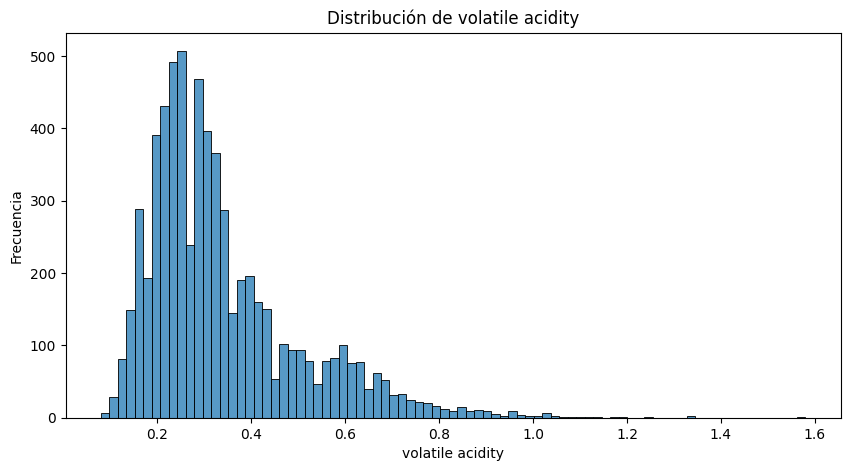

Descripción de la variable citric acid:
count    6463.000000
mean        0.318758
std         0.145252
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64


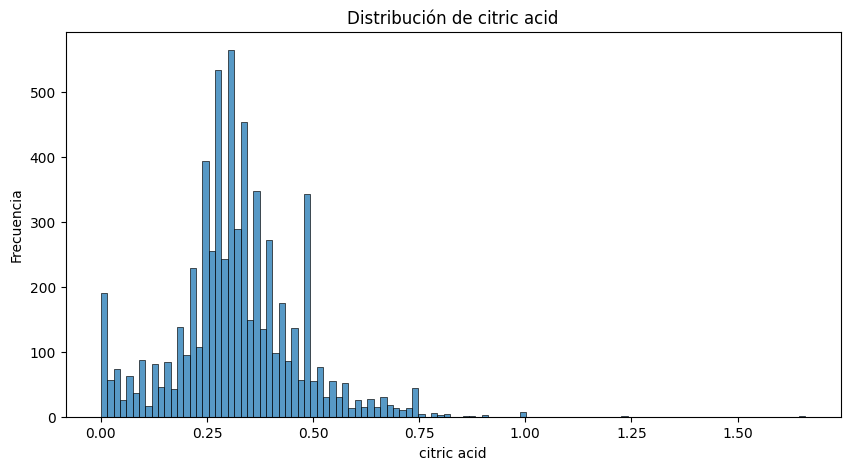

Descripción de la variable residual sugar:
count    6463.000000
mean        5.443958
std         4.756852
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64


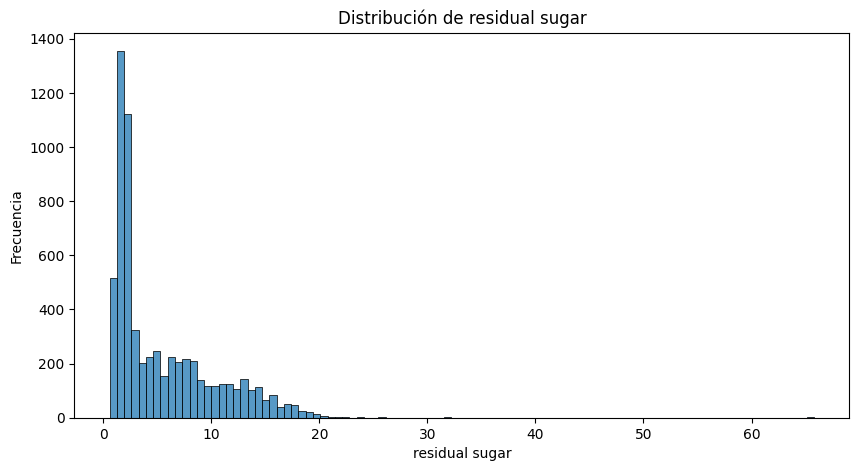

Descripción de la variable chlorides:
count    6463.000000
mean        0.056056
std         0.035076
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64


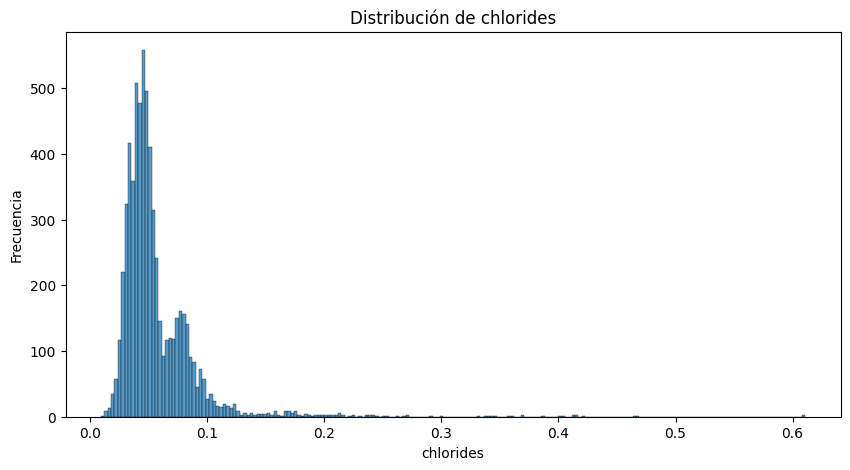

Descripción de la variable free sulfur dioxide:
count    6463.000000
mean       30.516865
std        17.758815
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64


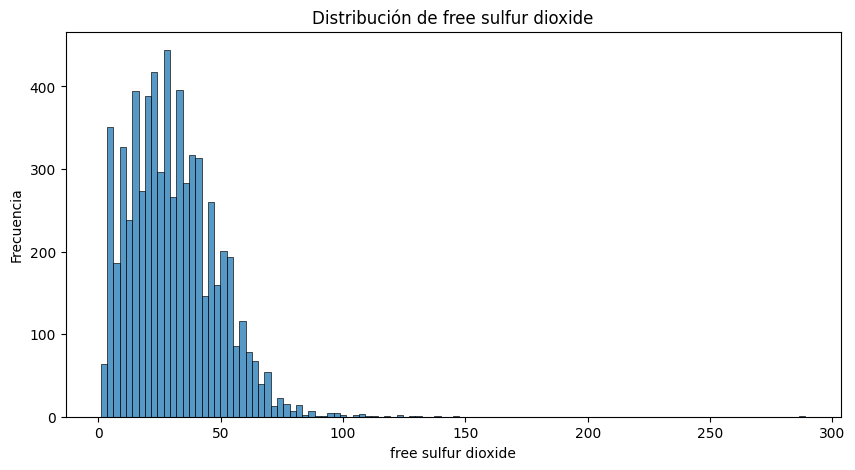

Descripción de la variable total sulfur dioxide:
count    6463.000000
mean      115.694492
std        56.526736
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64


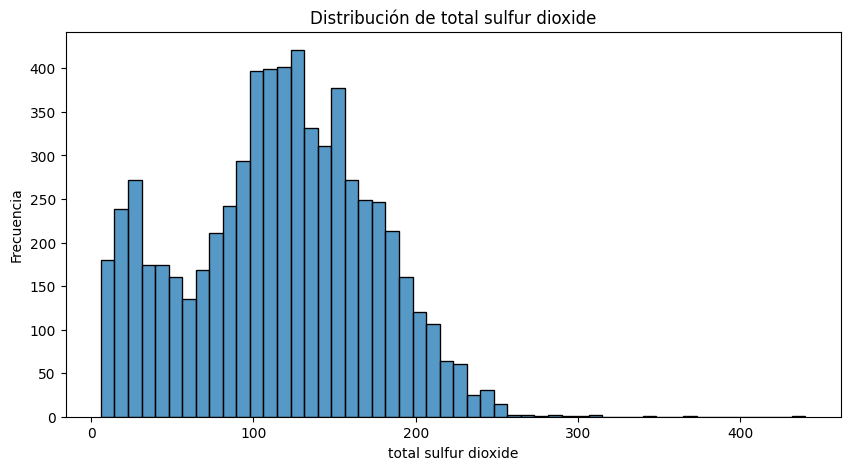

Descripción de la variable density:
count    6463.000000
mean        0.994698
std         0.003001
min         0.987110
25%         0.992330
50%         0.994890
75%         0.997000
max         1.038980
Name: density, dtype: float64


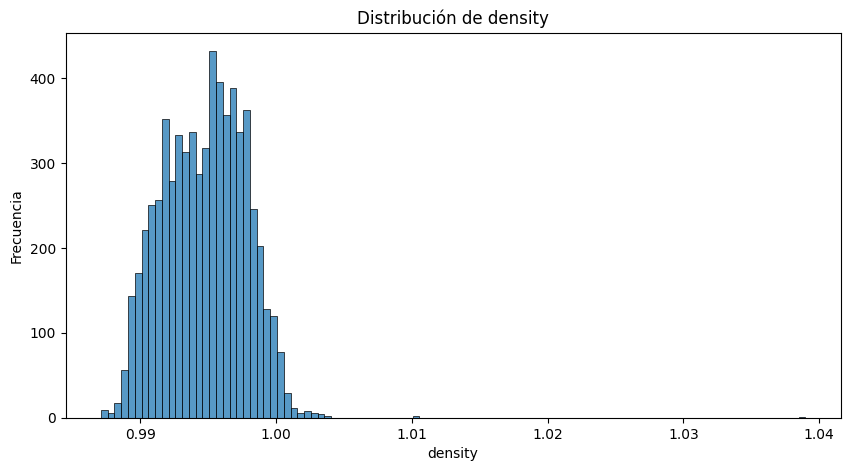

Descripción de la variable pH:
count    6463.000000
mean        3.218332
std         0.160650
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64


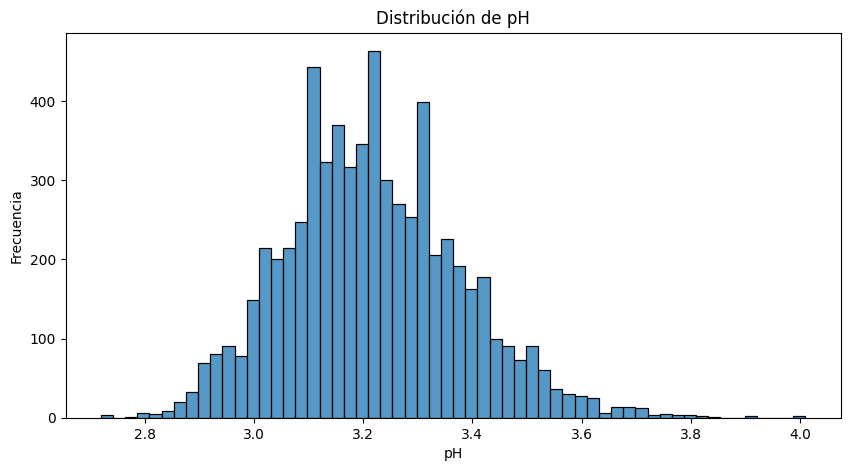

Descripción de la variable sulphates:
count    6463.000000
mean        0.531150
std         0.148913
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64


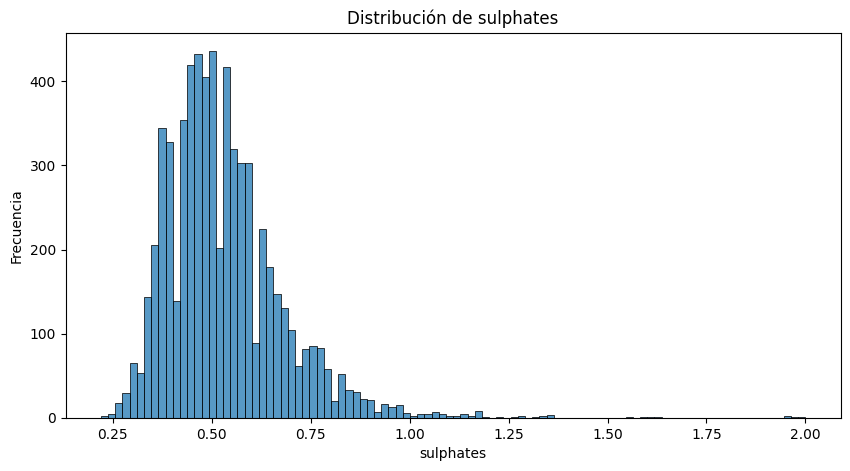

Descripción de la variable alcohol:
count    6463.000000
mean       10.492825
std         1.193128
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64


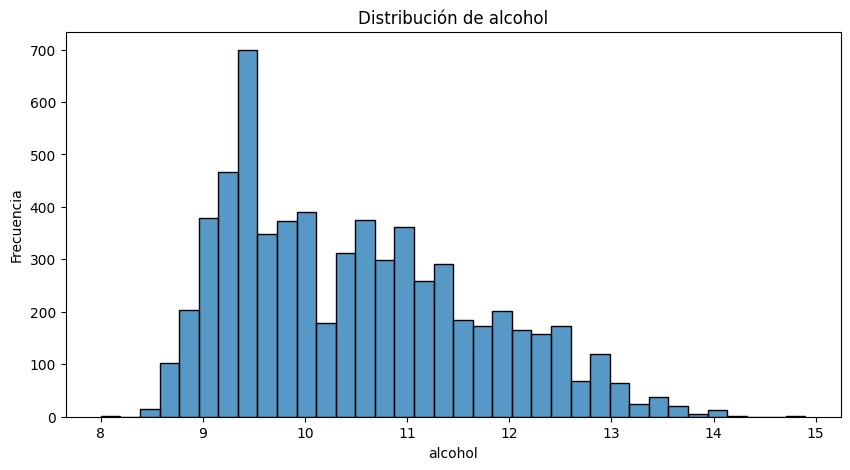

Descripción de la variable quality:
count    6463.000000
mean        5.818505
std         0.873286
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


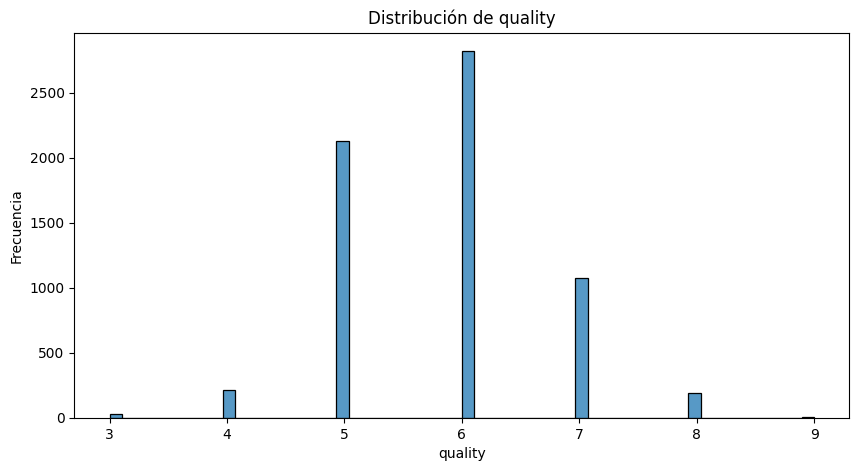

In [ ]:
# Hacemos un gráfico de distribución para cada variable
def describe_variable(var):
    print(f"Descripción de la variable {var}:")
    print(df[var].describe())
    plt.figure(figsize=(10, 5))
    sns.histplot(df[var])
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

for column in df.columns:
    describe_variable(column)

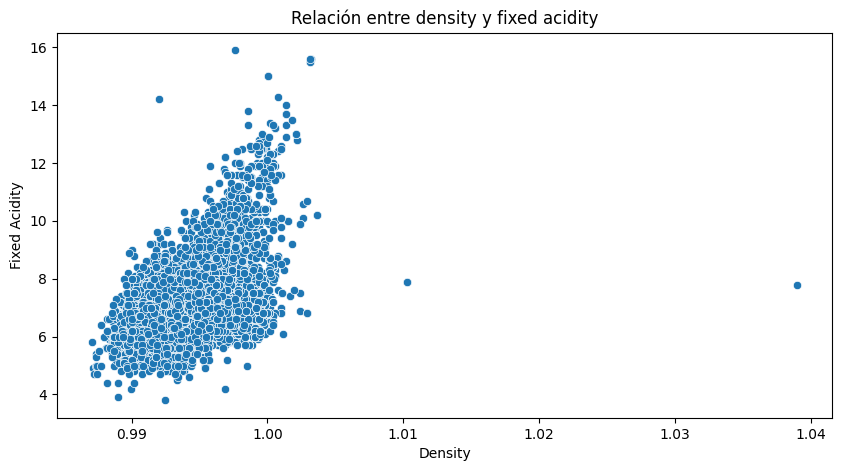

In [13]:
# Grafico para relacionar density con fixed acidity
plt.figure(figsize=(10, 5))
sns.scatterplot(x='density', y='fixed acidity', data=df)
plt.title("Relación entre density y fixed acidity")
plt.xlabel("Density")
plt.ylabel("Fixed Acidity")
plt.show()

VER SI HAY MEJORES FORMAS DE ESTE Y EL ANTERIOR

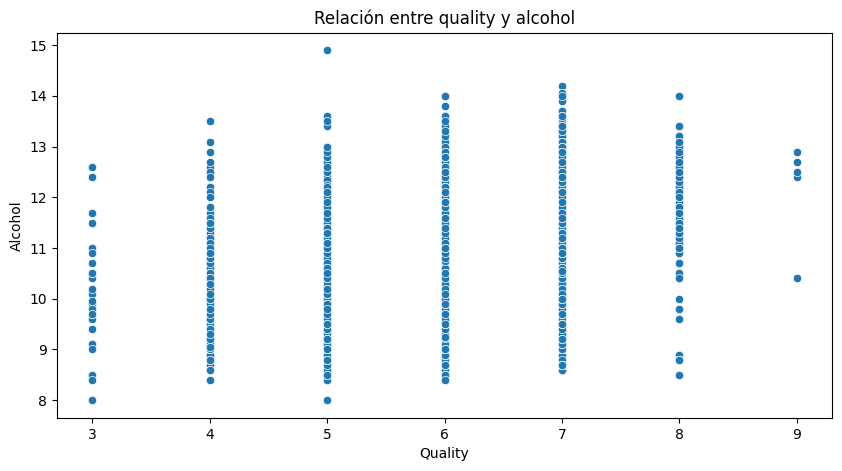

In [14]:
# Grafico para relacionar quality con alcohol
plt.figure(figsize=(10, 5))
sns.scatterplot(x='quality', y='alcohol', data=df)
plt.title("Relación entre quality y alcohol")
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.show()


### 1.3 Normalizar datos (3 puntos)

Realice un proceso de normalización, utilizando MinMaxScaler. No considere las variables quality y type.

Explique por qué es útil realizar esta normalización.

RESPUESTA: VER SI ESTA BIEN INCLUIRLAS VARIABLES DNVO

In [23]:
# Normalización de los datos, sin considerar la variable quality y type

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled = df_scaled.drop(columns=['quality', 'type'])
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])
print("Datos normalizados:")
print(df_scaled.head())

Datos normalizados:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.264463          0.126667     0.216867        0.308282   0.059801   
1       0.206612          0.146667     0.204819        0.015337   0.066445   
2       0.355372          0.133333     0.240964        0.096626   0.068106   
3       0.280992          0.100000     0.192771        0.121166   0.081395   
4       0.280992          0.100000     0.192771        0.121166   0.081395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.152778              0.377880  0.267785  0.217054   0.129213   
1             0.045139              0.290323  0.132832  0.449612   0.151685   
2             0.100694              0.209677  0.154039  0.418605   0.123596   
3             0.159722              0.414747  0.163678  0.364341   0.101124   
4             0.159722              0.414747  0.163678  0.364341   0.101124   

    alcohol  
0  0.115942  
1  0.217

### 1.4 Correlación (3 puntos)

Construya una matriz de correlación. Identifique las variables que presentan una alta relación lineal (superior a 0.6 o inferior a -0.6).

**Observación**

Para este análisis solo trabaje con las variables normalizadas en el paso anterior.

RESPUESTA:

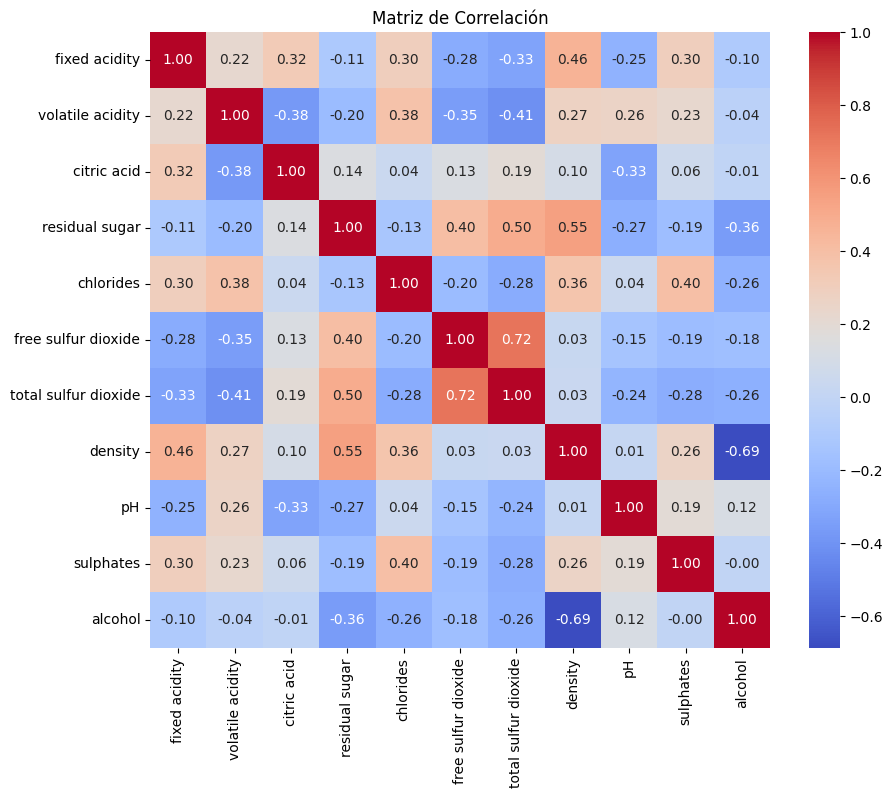

In [26]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

## Parte 2: Reducción de dimensionalidad PCA (10 puntos)

**En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza explicada en función del número de componentes. Analice los resultados obtenidos.

RESPUESTA: MEJORAR y ver si puedo 

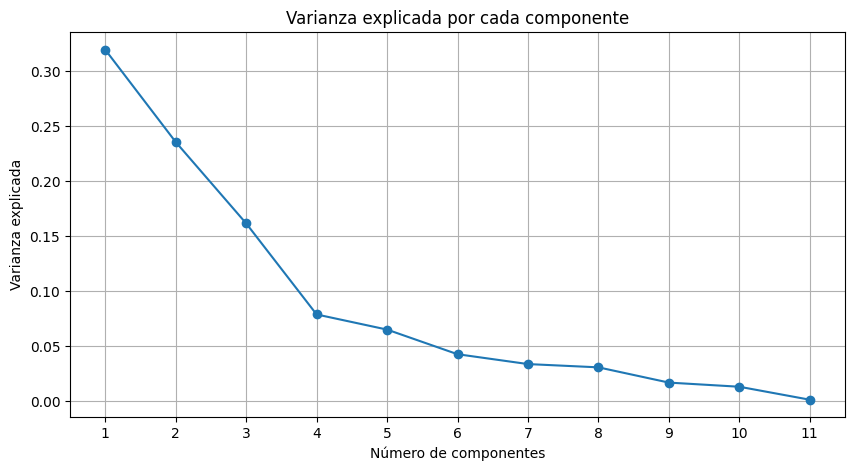

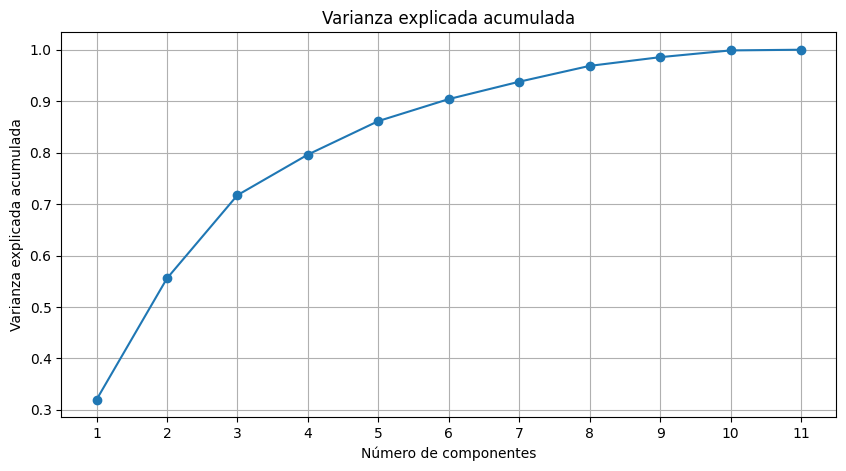

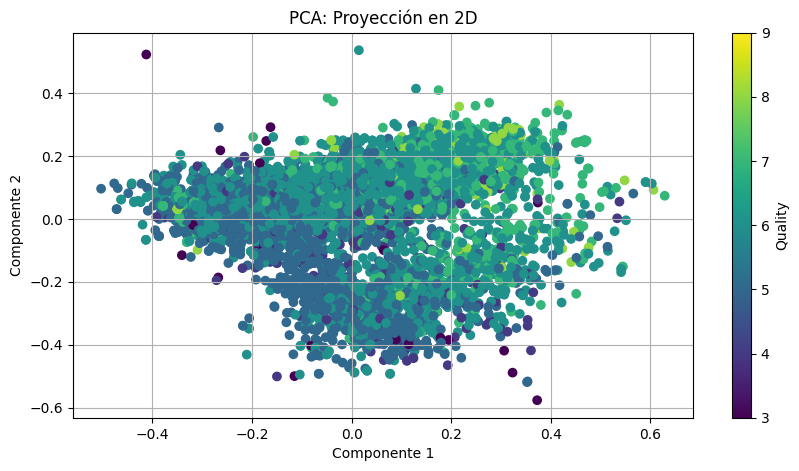

In [27]:
# Graficar comportamiento de la varianza explicada en función del numero de componentes
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Varianza explicada por cada componente")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

# Graficar comportamiento de la varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Varianza explicada acumulada")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()
# Graficar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)        
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['quality'], cmap='viridis')
plt.title("PCA: Proyección en 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Quality')
plt.grid()
plt.show()


### 2.2 Retener 90% de la varianza (3 puntos)

Aplique PCA para retener un 90% de la varianza del conjunto de datos normalizado del punto 1.3. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

In [30]:
# Aplicar pca para retener el 90% de la varianza
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(df_scaled)
print(f"Dimensiones originales: {df_scaled.shape}")
print(f"Dimensiones después de PCA: {X_pca.shape}")

# Cuantos componententes se retuvieron para el 90% de la varianza
n_components = pca.n_components_
print(f"Componentes retenidos para el 90% de la varianza: {n_components}")

Dimensiones originales: (6463, 11)
Dimensiones después de PCA: (6463, 6)
Componentes retenidos para el 90% de la varianza: 6


### 2.3 Reducir dimensionalidad a n=2 (2 puntos)

Considerando el dataset normalizado del punto 1.3, aplique PCA con un número de componentes igual a 2 . Determine la proporción de varianza explicada.

RESPUESTA:

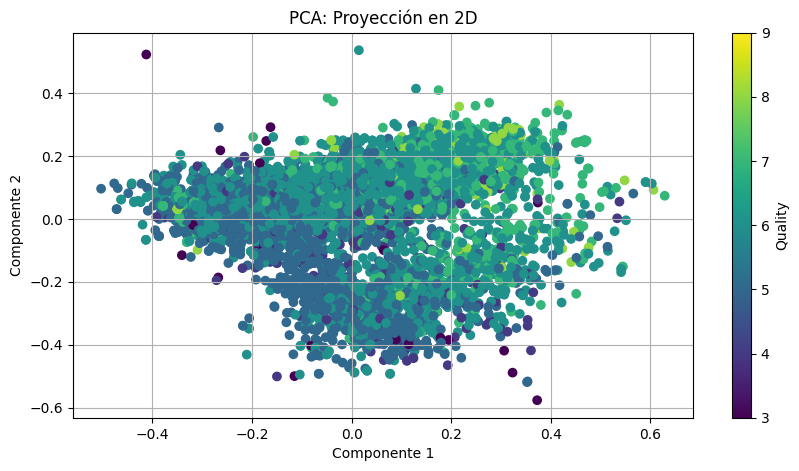

In [31]:
# Reducir el dataset a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['quality'], cmap='viridis')
plt.title("PCA: Proyección en 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Quality')
plt.grid()
plt.show()

## Parte 3: Detección de outliers (10 puntos)

**En esta tercera parte se debe evaluar la existencia de outliers. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza)**.

### 3.1 Graficar histograma LOF (4 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 8 y use como métrica la distancia euclidiana. Analice los resultados obtenidos.

RESPUESTA:

### 3.2 Identificar datos atípicos (6 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -1.5, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

## Parte 4: Visualización T-SNE y UMAP (20 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

### 4.1 T-SNE (6 puntos)

Describa las principales características del modelo T-SNE.

Ajuste un modelo de 2 componentes mediante T-SNE. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo. ¿Reconoce algún patrón?


RESPUESTA:

### 4.2 UMAP (6 puntos)

Describa las principales características del modelo UMAP.

Ajuste un modelo 2 componentes mediante UMAP. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo. Compare con el gráfico obtenido al trabajar con TSNE.

RESPUESTA:

### 4.3 TSNE y UMAP con labels (8 puntos)

Sobre los gráficos obtenidos en los puntos 4.1 (T-SNE) y 4.2 (UMAP), incorpore la variable "type" del dataset original de tal manera que se pueda observar a qué tipo de vino corresponde cada punto del gráfico. ¿Se observa algún patrón?

Luego, repita el mismo procedimiento, pero trabajando con la variable "quality". Es decir, cada punto en el gráfico debe reflejar la calidad de vino.

Analice los resultados y formule una conclusión.

RESPUESTA: